In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy.signal as sig
# local imports
import Plotting as myplt

In [2]:
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Data\\'

# Data

In [3]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Laser 1s'   : path_data + '2-Slit Interference Lab - Laser Single Slit-8_24_23.csv',
   'Laser 2s'   : path_data + '2-Slit Interference Lab - Laser Interference Pattern (fine)-8_24_23.csv',
   'Bulb 2s t1' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern-8_31_23.csv',
   'Bulb 2s t2' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 2.csv',
   'Bulb 2s t3' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 3.csv'
} # s==slit, t==trial

def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

Laser 1s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Laser 2s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Bulb 2s t1 columns:	 ['Micrometer Position (mm)', 'Counts/10s', 'Photon/S (Hz)']
Bulb 2s t2 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']
Bulb 2s t3 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']


In [4]:
def ChooseYkey(valueDict: dict[str, np.array]) : 
    if('Voltage (V)' in valueDict) : 
        return 'Voltage (V)'
    elif('Photon/S (Hz)' in valueDict) : 
        return 'Photon/S (Hz)'
    else : 
        raise Exception('Bad Key')

# Maxima and Minima

Laser 1s


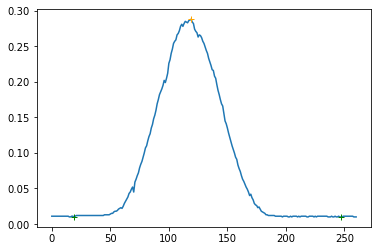

Laser 2s


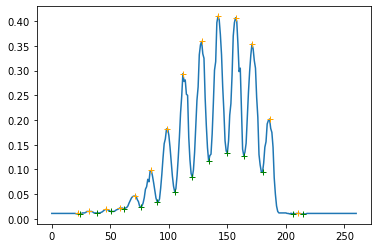

Bulb 2s t1


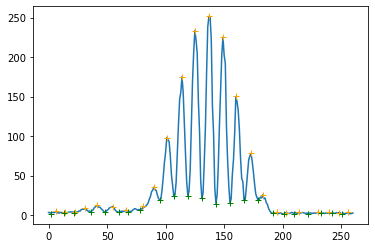

Bulb 2s t2


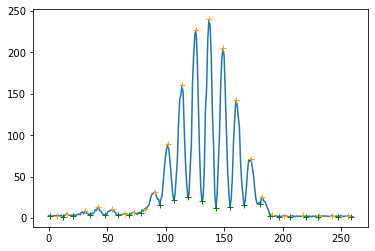

Bulb 2s t3


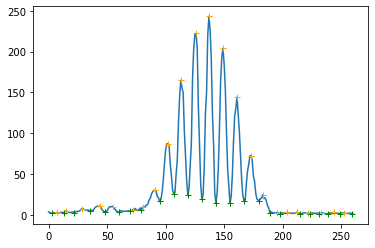

In [5]:
def FindMaxMin(
    x : np.array, 
    distance=8,
    test: bool = True
) -> tuple[np.array]: 
    # find peaks/maxima 
    maxima, _ = sig.find_peaks(  x, distance=distance) # returns indices of peaks in `x` that satisfy all given conditions.
    #  invet plot to make the minima the peaks
    minima, _ = sig.find_peaks(1-x, distance=distance) # returns indices of peaks in `x` that satisfy all given conditions.
    # mark max and min on
    if(test) : 
        plt.plot(x)
        plt.plot(maxima, x[maxima], "+", c='orange')
        plt.plot(minima, x[minima], "+", c='green' )
        plt.show()
    return (maxima, minima)


def FindMaxMinForAll(
    tables: dict[str, dict[str, np.array]], 
    test: bool = True
) : 
    # loop for each item 
    for keyExperiment,valueDict in tables.items() : 
        print(keyExperiment)
        # choose key 
        useKey = ChooseYkey(valueDict)
        # choose point distance
        if(keyExperiment == 'Laser 1s') : 
            distance = 200
        else : 
            distance = 8
        # add to dict 
        tables[keyExperiment]['Maxima indices'], tables[keyExperiment]['Minima indices'] = FindMaxMin(
                tables[keyExperiment][useKey], 
                distance,
                test
            )

FindMaxMinForAll(tables, True)

In [17]:
def CalcDx(
    indices: np.array, 
    x: np.array, 
    range: tuple[float] = (0.,10.)
) : 
    extremaX = x[indices]
    extremaX = extremaX[extremaX > range[0]]
    extremaX = extremaX[extremaX < range[1]]
    return np.diff( extremaX )


def FindDxMaxMinForAll(
    tables: dict[str, dict[str, np.array]], 
    test: bool = True
) : 
    # loop for each item 
    for keyExperiment,valueDict in tables.items() : 
        # skip single slits
        if('1s' in keyExperiment) : continue
        # print experiment title
        print(keyExperiment)
        # calculate difference between maxima and minima 
        dxMax = CalcDx(tables[keyExperiment]['Maxima indices'], tables[keyExperiment]['Micrometer Position (mm)'] ) 
        dxMin = CalcDx(tables[keyExperiment]['Minima indices'], tables[keyExperiment]['Micrometer Position (mm)'] ) 
        dxExtrema = np.concatenate((dxMax,dxMin))
        # add to dict 
        tables[keyExperiment]['Extrema dx'] = dxExtrema
        # plot hist 
        if(test) : 
            print(dxExtrema)
            plt.hist(dxExtrema, histtype='bar',  color='gray', alpha=0.5)
            plt.hist(dxMax,     histtype='step', color='orange')
            plt.hist(dxMin,     histtype='step', color='green' )
            plt.show()
            plt.close()

FindDxMaxMinForAll(tables, False)
        

Laser 2s
Bulb 2s t1
Bulb 2s t2
Bulb 2s t3


In [7]:
def GetStats(x) -> dict[str,float] :
    return {
        'Mean'   : round(np.mean(   x ), 6),
        'Median' : round(np.median( x ), 6),
        'StdDev' : round(np.std(    x ), 6),
    }

def GetDxStatsForAll(
    tables: dict[str, dict[str, np.array]], 
    test: bool = True
) : 
    # loop for each item 
    for keyExperiment,valueDict in tables.items() : 
        # skip single slits
        if('1s' in keyExperiment) : continue
        # print experiment title
        print(keyExperiment)
        # get reference to data 
        dx = tables[keyExperiment]['Extrema dx']
        # save dictionary of stats 
        tables[keyExperiment]['Extrema dx stats'] = GetStats(dx)
        # print stats
        if(test) : 
            print(tables[keyExperiment]['Extrema dx stats'])

GetDxStatsForAll(tables)

Laser 2s
{'Mean': 0.695652, 'Median': 0.7, 'StdDev': 0.075055}
Bulb 2s t1
{'Mean': 0.574242, 'Median': 0.6, 'StdDev': 0.098566}
Bulb 2s t2
{'Mean': 0.567188, 'Median': 0.575, 'StdDev': 0.094049}
Bulb 2s t3
{'Mean': 0.583871, 'Median': 0.6, 'StdDev': 0.101112}
